<a href="https://colab.research.google.com/github/mintra-tippayaratsontorn/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

###  Generate Data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)
# กำหนดตัวอย่างมีกี่จุด / กำหนดให้มีกี่กลุ่ม /  ฟีเจอร์ของxเท่าไหร่ / กำหนดแรนด้อมสเตจ

### Explore Data

In [ ]:
X.shape

(500, 2)

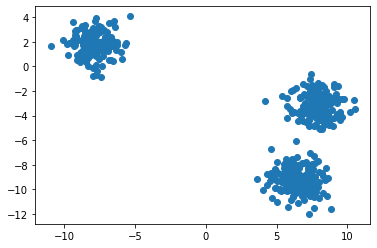

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

### Clustering

#### Import

In [ ]:
from sklearn.cluster import KMeans

#### Define

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-predict

In [ ]:
y_clust = kmeans.fit_predict(X)

In [ ]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

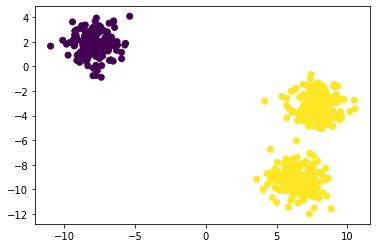

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y_clust)

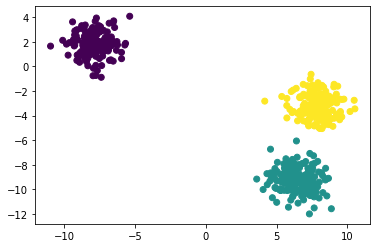

In [ ]:
# 3 clusters

# define
kmeans = KMeans(n_clusters=3, random_state=6)
# fit-predict
y_clust = kmeans.fit_predict(X)
# plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

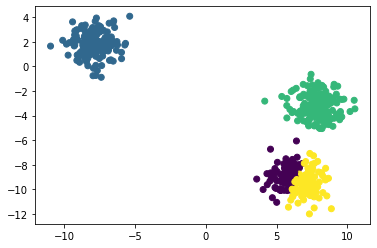

In [ ]:
# 4 clusters

# define
kmeans = KMeans(n_clusters=4, random_state=6)
# fit-predict
y_clust = kmeans.fit_predict(X)
# plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

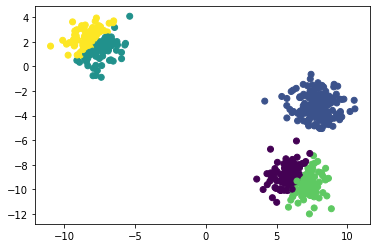

In [ ]:
# 5 clusters

# define
kmeans = KMeans(n_clusters=5,  random_state=14, init='random')
# fit-predict
y_clust = kmeans.fit_predict(X)
# plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

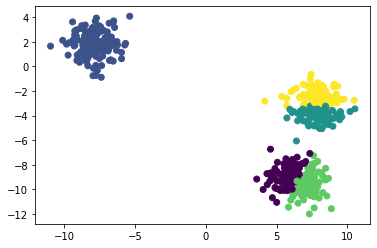

In [ ]:
# 5 clusters

# define
kmeans = KMeans(n_clusters=5,  random_state=6, init='random')
# fit-predict
y_clust = kmeans.fit_predict(X)
# plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

## Example Application (Color Quantization)

In [ ]:
import cv2
import os

In [ ]:
img = cv2.imread('/content/b8be0e0e188abc4169051df8b1a90a76.jpg')

In [ ]:
img.shape

(655, 700, 3)

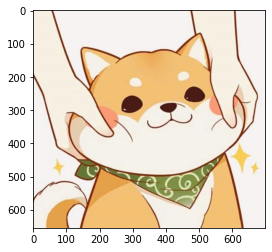

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

#### นับจำนวนสี

In [ ]:
import numpy as np

In [ ]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(58730, 3)

#### จัดกลุ่มสีให้เหลือ 16 สี

In [ ]:
myquantize = KMeans(n_clusters=16, random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [ ]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(458500, 3)

In [ ]:
final_color = myquantize.fit_predict(img_row)

ใช้ centroid เป็นตัวแทนของสี

In [ ]:
centroid = myquantize.cluster_centers_

In [ ]:
centroid

array([[247.36563274, 239.41747848, 225.93192593],
       [173.6004663 , 148.67019924, 115.30902925],
       [243.23135535, 158.3585777 , 117.99468945],
       [111.31128092, 114.03800523,  56.73315906],
       [246.97308227, 243.12550326, 242.14039619],
       [228.03133359, 160.49988536,  77.96752006],
       [157.69426486, 106.22127216,  75.22815433],
       [231.2787883 , 206.90663255, 172.99017913],
       [131.2839309 , 142.05007984,  73.77340688],
       [242.95866221, 192.11029492, 115.63203405],
       [244.96966794, 224.86728395, 200.97573436],
       [245.11091623, 241.69049599, 234.46477991],
       [203.7739472 , 178.31289548, 147.85904429],
       [123.0675567 ,  73.07270388,  42.17355638],
       [108.00393413,  45.85032022,  14.51857274],
       [ 75.470722  ,  28.99360432,  18.0564241 ]])

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

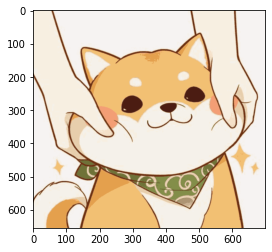

In [ ]:
plt.imshow(new_img/255)

In [ ]:
plt.imsave('img.jpg',new_img/255)

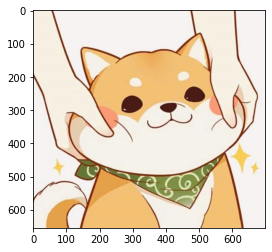

In [ ]:
plt.imshow(RGB_img)